In [7]:
spark

In [8]:
import json
import numpy as np
from collections import Counter
data = spark.read.json('/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Query/Year=2019/Month=07/Day=05/Hour=10')


In [9]:
def preprocessing(data):
    data1 = data.filter((data.inflow_channel == "i")&(data.tabcode == "tot"))
    data3 = data1.select("dacode","query").collect()
    uuid = data1.filter(data1.uuid != "").select("uuid").collect()
    totalQuery = data1.count()
    return data3, uuid, totalQuery

In [10]:
print (data.printSchema())
refined_data, uuid, totalQuery = preprocessing(data)

root
 |-- adid: string (nullable = true)
 |-- adid_enabled: string (nullable = true)
 |-- bucket: struct (nullable = true)
 |    |-- id: string (nullable = true)
 |-- dacode: string (nullable = true)
 |-- display: struct (nullable = true)
 |    |-- CUT: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- code: string (nullable = true)
 |    |    |    |-- doc_count: long (nullable = true)
 |    |    |    |-- documents: array (nullable = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |    |    |-- lineup_engine_score: long (nullable = true)
 |    |    |    |-- lineup_ranking_score: long (nullable = true)
 |    |-- SER: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- code: string (nullable = true)
 |    |    |    |-- doc_count: long (nullable = true)
 |    |    |    |-- documents: array (nullable = true)
 |    |    |    |    |-- element: struct (containsNull = true)
 |

In [11]:
print (totalQuery) # 통합 검색 유입 수
deduplicated_uuid = list(set(uuid))
print (len(deduplicated_uuid)) # uuid 수

1488105
530901


In [180]:
def extractGuideQuery(data):
    query = []
    userCode = ["PV2","PVS","SRM","SRE","NKC","3NW","3IK","3UO","FXX","BNR","DISC","CQV"

,"CQC","CQF","CQH","CZE","ACAG","YGE","PGXS","HFX","R6T","RAT","RGT","1TR"

,"RNN","EOA","QNLI","HTQ","BSKM","VLY","FPJZ","GLT","1DR","R1T","R5T"

,"AQL","MBK","ZSIQ","VDZ","LUIK","MCO","GCID","R0T","R7T","DRU","TSQE"

,"SGZ","PPKM","LEE","PQPL","1MV","1ET","1TH","RSTO","RFE","QPD","JPDW"

,"RME","RMEO","RKR","R2T","KYW","OUJ","R8T","FWP","IMY","BXJ","CQN","CBX"

,"DZR","RFT","3RT","LEI","BOCY","RJT","1BO","R3T","DTX","FFJ","PRG","CHD"

,"CAD","CAO","CQR","CAH","ACB","ZZZ","PES","CXQ","LHX","IMZ","KTFK","FSY"

,"TSP","RXU","BALE","MVP","WENY","DKSX","1SZ","C80","CBG","CPF","4SZ"

,"RZKM","4WH","AWSA","4TZ","DPGR","KUOW","4HH","4HZ","GJOG","BRGF","4BZ"

,"4CI","NGHR","WYUF","4CJ","4CH","ENFH","4CK","GMVC","4CL","BOZD","4CZ"

,"RYZK","NJFE","4CM","YWZM","5BZ","02L","02I","02H","02P","73L","73H"

,"IWW","6HH","P13","P9I","P9J","P9K","LAT","LAH","LAY","LAM","LAF","P14"

,"PSJ","PSK","ES2","FUN","G29","G27","TWF","LIV","YYG","YYGZ","G28","TAS"

,"XLTN","TP2","RP7","EE2","JIIE","TP3","TP4","CAOV","5GT","QWGF","QWG"

,"XEO","ZXEO","TUAG","UAG","ATGF","ATG","TP5","TZTN","TP6","QAFA","PYU"

,"TCN","NPI","NPIO","OZZ","TT3","TMN","TMO","TTS","STGZ","LFQD","TPO"

,"13I","13J","13K","13H","YZDZ","TP0","TMZ","04H","SRP","EVT","EV1","SCN"

,"SCO","SCT","SCF","SCP","EV2","11S","11H","11M","12L","12I","12J","12K"

,"12H","23P","23Q","23R","23W","EE1","23L","23I","23J","23K","23H","78I"

,"78J","78K","78H","77I","77J","77K","77H","DIK","DIN","DIP","DIE","DIH"

,"ES0","24I","24J","24K","24M","24H","LGW","16H","16M","SST","SSS","SH7"

,"SHT","MCZ","MCY","MCH","MCX","17L","17I","17J","17K","17H","MEI","MES"

,"MEE","MEH","MPR","18H","18M","21H","MMRR","22H","27I","27J","27H","27K"

,"27M","28H","28M","BIN","BIP","BIE","BIH","INV","BZ5","BZ7","BZ6","BZA"

,"BZ4","BZ9","BZ8","BZF","P12","ES3","29S","29L","29I","29J","29K","29H"

,"31L","31H","BXH","BXM","LFQ","STG","SHA","SHX","SHY","SHZ","SHR","SHH"

,"XDP","BESE","25Z","25I","25J","25K","25H","40L","40I","40H","ALD","ATN"

,"PN1","PE1","P11","26L","26I","26J","26K","26H","26Q","43H","43M","ESL"

,"EB7","EBD","EB4","EB6","EB3","EB5","EBR","EB2","EB9","EB8","EB1","EBC"

,"EBA","OFP","30S","30I","30J","30K","30H","53H","53M","54X","54L","54I"

,"54J","54K","54H","55L","55H","CSK","CH6","CH7","CHH","CH8","CEV","CH5"

,"57M","57H","57N","KML","KMV","KSW","KTI","KTJ","KTK","KTH","KPH","KPT"

,"KH5","KH4","KH6","79H","79M","60M","60N","60E","60L","60I","60J","60K"

,"60H","60Q","60S","60R","60P","62L","62H","ES1","KTW","XB4","PCH","WPNY"

,"NVZ","P9H","69H","69M"]

    for meta in data:
        if meta["dacode"] in userCode:
            query.append(meta["query"])
    return query

def extractUserQuery(data):
    query = []
    guideCode = ["GQQ","BNF","OXW","SBC","CBC","STCO","MEK","NSJ","SJTO","SDTO","RSJ"

,"TVZK","DCC","TOW","BEA","LPJ","MLD","HQQ","V5A","LCX","MEU","TOB","YRI"

,"OBYY","SUG","GIQ","IHPV","FKB","HLYS","EKS","EKT","ADYG","FBQ","Z00"

,"NDA","NSP","SWTO","NBC","NKE","AEO","NBD","BFT","NBB","TOV","TOM","JNB"

,"OWI","HHPP","TBC","LCY","ARIV","FFV","KXL","IBR","XFN","CAJ","CAS","CAC"

,"CAB","BFJ","1SY","OXLY","1SE","LRPG","1SB","HOOH","MGDA","1SC","UEAK"

,"1SF","1SG","MCSS","1SA","VVJJ","1SD","YWZE","CSU","CSR","CSH","CRK"

,"4SY","WERT","4SW","4SE","DBDA","4SB","RYRR","4SC","KQDZ","4SF","FFGU"

,"NNOC","4SG","XKPY","4SA","NTCE","4SD","ZHMB","4TY","4TW","TFBY","4TE"

,"4TB","HDJX","4TC","IWTD","4TF","FBBS","4TG","JYFA","XECV","4TA","SXME"

,"4TD","4HY","XZZM","4HE","DBSD","4HB","FHHG","4HC","JWIE","4HF","ZUEN"

,"UYWP","4HG","SJAN","4HA","POKL","4HD","4BY","FAFB","NHJS","4BB","4BC"

,"DLJF","AOIT","4BF","4BG","ZWUS","4BA","ZXKK","4BD","YVDE","4CY","UHWD"

,"4CE","HRPR","4CB","AIVF","WOBG","4CC","TSGG","4CF","MWOD","4CG","4CA"

,"WPNI","4CD","VCFA","5BY","LAJA","GPLV","5BB","5BC","ZUGC","MLNC","5BF"

,"5BG","YYHQ","5BA","HTEN","5BD","FQZH","02C","02D","JU2","JU1","73C"

,"73D","LAS","LAD","LAR","WFVZ","TP1","FLW","CCC","CCCS","UMEF","UME"

,"UMZ","BSZ","BSZC","VOSR","VOS","WHO","WHOL","YZR","YZRR","BJEZ","BJE"

,"TP7","HFSV","TDK","04C","04D","08B","08C","08A","08D","NPF","NTF","NBF"

,"11A","12B","12C","12A","12D","13A","23B","CYRK","23C","MCEU","23A","23D"

,"23T","78B","78C","78D","77B","77C","77D","DRAG","DRG","DIF","DID","24B"

,"24C","24A","24D","SH5","15B","15C","15A","15D","16B","16C","16A","16D"

,"MCG","MCB","17C","17A","17D","21B","21C","21A","21D","MLS","27B","27C"

,"27A","27D","28B","28C","28A","28D","BIF","BID","BZG","BZ3","BZ1","BZ2"

,"29B","29C","29A","29D","31B","31C","31A","31D","32A","BXV","BXW","XDY"

,"APMK","XDB","APSG","APZC","XDC","XDF","VOCR","WHCL","XDG","XDA","APBN"

,"XDD","APRE","APRD","XDZ","33B","33C","33A","33D","JU3","JU4","SHS","SHC"

,"SHB","SWB","25B","JOPK","25C","25A","CNTO","25D","40B","40C","40A","40D"

,"AHW","ACW","AC3","AC4","ACF","ACG","AC1","AC2","ELF","26B","QCDU","26C"

,"26A","MEFX","26D","43B","43C","43A","43D","45A","SH6","SHN","SHM","30B"

,"30C","30A","30D","51A","JUE","JUB","JUC","JUF","JUG","JUA","NXVN","JUD"

,"53B","53C","53D","54B","54C","54A","54D","74B","74C","74A","74D","CHS"

,"CHB","CHR","57B","57C","57A","57D","KH3","KH1","KH2","60B","60C","60A"

,"60D","62B","62C","62A","62D","QSU","QSS","QVO","QMU","QSE","QSL","JU6"

,"JU5","63A","64B","64C","64A","64D","67B","67A","NVY","AAVC","NVW","NVE"

,"ZZOP","NVB","NVC","NAAQ","NVF","NVG","NVA","VNGE","NVD","XLKC","P09"

,"69B","69C","69A","69D"]
    
    for meta in data:
        if meta["dacode"] in guideCode:
            query.append(meta["query"])
    return query

In [181]:
userQ = extractUserQuery(refined_data)
guideQ = extractGuideQuery(refined_data)

In [182]:
print (len(userQ))
print (len(guideQ))
print (userQ[0])

1105098
323692
팔룡근린공원


In [183]:
def getTop10(userQ, guideQ, data):
    data1 = data.filter(data.inflow_channel == "i")
    data2 = data1.filter(data1.tabcode == "tot")
    data3 = data2.select("query").collect()
    data_hasUid = data2.filter(data2.uuid != "")
    data_hasUid = data_hasUid.dropDuplicates(['uuid']).select("query").collect()
    res_u = Counter(userQ).most_common(10)
    res_g = Counter(guideQ).most_common(10)
    res_d = Counter(data3).most_common(10)
    res_i = Counter(data_hasUid).most_common(10)
    return res_u, res_g, res_d, res_i

In [184]:
res_u, res_g, res_d, res_i = getTop10(userQ ,guideQ, data)

In [185]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from matplotlib import font_manager, rc

font_manager.get_fontconfig_fonts()
font_name = font_manager.FontProperties(fname="/usr/share/fonts/dejavu/NanumBarunGothicBold.ttf").get_name()

rc('font', family=font_name)


q_k = []
q_v = []
i_k = []
i_v = []
u_k = []
u_v = []
g_k = []
g_v = []

for meta in res_d:
    q_k.append(meta[0].query)
    q_v.append(meta[1])
    
for meta in res_i:
    i_k.append(meta[0].query)
    i_v.append(meta[1])
    
for meta in res_u:
    u_k.append(meta[0])
    u_v.append(meta[1])
    
for meta in res_g:
    g_k.append(meta[0])
    g_v.append(meta[1])
    

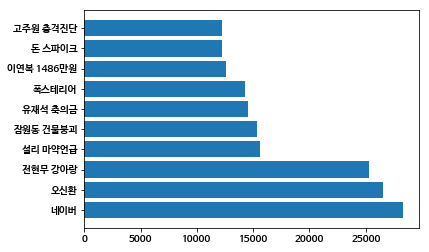

In [186]:
labels = q_v
values = q_k

#plt.bar(labels,values,width=0.7)
plt.barh(values, labels, align='center')
plt.show()

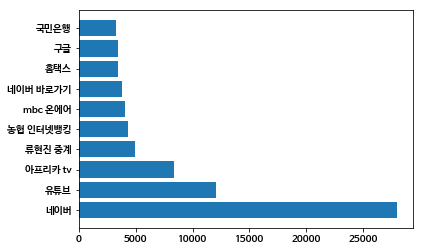

In [187]:
labels = u_v
values = u_k

#plt.bar(labels,values,width=0.7)
plt.barh(values, labels, align='center')
plt.show()

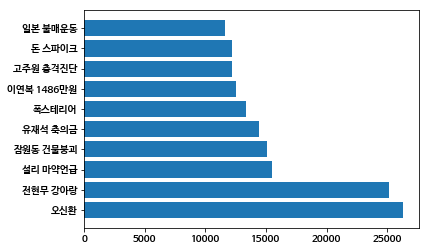

In [188]:
labels = g_v
values = g_k

#plt.bar(labels,values,width=0.7)
plt.barh(values, labels, align='center')
plt.show()

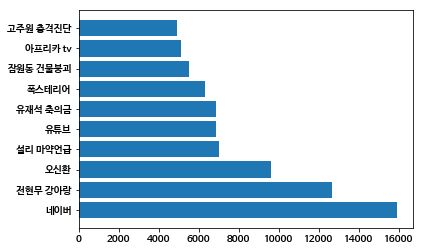

In [189]:
labels = i_v
values = i_k

#plt.bar(labels,values,width=0.7)
plt.barh(values, labels, align='center')
plt.show()

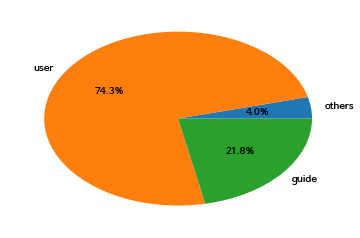

In [190]:
plt.pie([totalQuery-len(userQ)-len(guideQ),len(userQ),len(guideQ)],labels=["others","user","guide"], autopct='%1.1f%%')
plt.show()

In [191]:
data1 = data.filter((data.inflow_channel == "i")&(data.tabcode == "tot"))
for meta in q_k:
    code = data1.filter(data1.query == meta).select("dacode").collect()
    code = Counter(code).most_common(1)
    print (code)

[(Row(dacode=u'YZR'), 13664)]
[(Row(dacode=u'ATG'), 19228)]
[(Row(dacode=u'NPI'), 25165)]
[(Row(dacode=u'NPI'), 15503)]
[(Row(dacode=u'ATG'), 8598)]
[(Row(dacode=u'NPI'), 14461)]
[(Row(dacode=u'ATG'), 8484)]
[(Row(dacode=u'NPI'), 12515)]
[(Row(dacode=u'ATG'), 6311)]
[(Row(dacode=u'NPI'), 12227)]


In [192]:
for meta in u_k:
    code = data1.filter(data1.query == meta).select("dacode").collect()
    code = Counter(code).most_common(1)
    print (code)

[(Row(dacode=u'YZR'), 13664)]
[(Row(dacode=u'UME'), 6351)]
[(Row(dacode=u'UME'), 6330)]
[(Row(dacode=u'UME'), 3705)]
[(Row(dacode=u'UME'), 3530)]
[(Row(dacode=u'ATG'), 3902)]
[(Row(dacode=u'UME'), 3208)]
[(Row(dacode=u'YZR'), 1838)]
[(Row(dacode=u'YZR'), 1710)]
[(Row(dacode=u'YZR'), 1462)]


In [193]:
for meta in g_k:
    code = data1.filter(data1.query == meta).select("dacode").collect()
    code = Counter(code).most_common(1)
    print (code)

[(Row(dacode=u'ATG'), 19228)]
[(Row(dacode=u'NPI'), 25165)]
[(Row(dacode=u'NPI'), 15503)]
[(Row(dacode=u'ATG'), 8598)]
[(Row(dacode=u'NPI'), 14461)]
[(Row(dacode=u'ATG'), 8484)]
[(Row(dacode=u'NPI'), 12515)]
[(Row(dacode=u'NPI'), 12227)]
[(Row(dacode=u'ATG'), 6311)]
[(Row(dacode=u'ATG'), 6060)]


In [194]:
for meta in i_k:
    code = data1.filter(data1.query == meta).select("dacode").collect()
    code = Counter(code).most_common(1)
    print (code)

[(Row(dacode=u'YZR'), 13664)]
[(Row(dacode=u'NPI'), 25165)]
[(Row(dacode=u'ATG'), 19228)]
[(Row(dacode=u'NPI'), 15503)]
[(Row(dacode=u'UME'), 6351)]
[(Row(dacode=u'NPI'), 14461)]
[(Row(dacode=u'ATG'), 8484)]
[(Row(dacode=u'ATG'), 8598)]
[(Row(dacode=u'UME'), 6330)]
[(Row(dacode=u'NPI'), 12227)]
